# Main Library

In [1]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation ,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
path = r'C:\Users\user\Downloads\archive (7)\Fruit And Vegetable Diseases Dataset'
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',]

class_labels = ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten',]



images = []
labels = []

count = 0
for folder in columns:
    for img in os.listdir(path + '/' + folder):
        image = cv2.imread(path + '/' + folder + '/' + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(count)
    count += 1
    
print(len(images)), print(len(labels))

10168
10168


(None, None)

In [3]:
data = np.array(images).astype('float32')
data = data / 255.0

labels = np.array(labels)

print(data.shape)

(10168, 128, 128, 3)


In [4]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

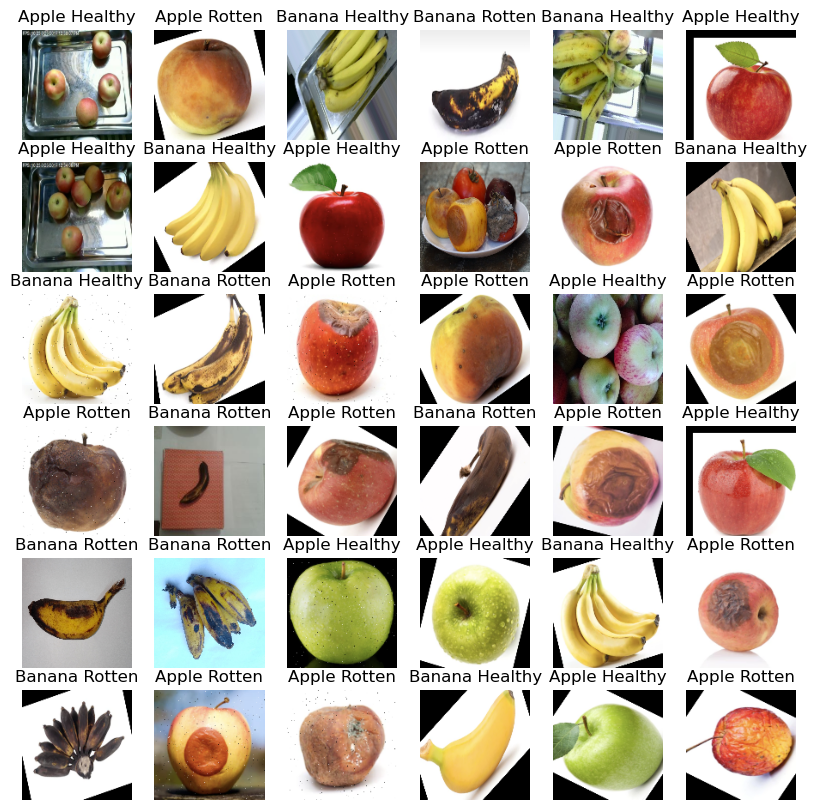

In [5]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

In [7]:


model_mobilenet = MobileNet(include_top=False, input_shape=(224, 224, 3))
model = Sequential()
for layer in model_mobilenet.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(GlobalAveragePooling2D())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             

 Total params: 3,525,700 (13.45 MB)

 Trainable params: 296,324 (1.13 MB)

 Non-trainable params: 3,229,376 (12.32 MB)

In [8]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 74s 269ms/step - accuracy: 0.8471 - loss: 0.3857 - val_accuracy: 0.9730 - val_loss: 0.0716
Epoch 2/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 75s 294ms/step - accuracy: 0.9734 - loss: 0.0725 - val_accuracy: 0.9853 - val_loss: 0.0451
Epoch 3/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 119s 468ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9784 - val_loss: 0.0582
Epoch 4/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 101s 396ms/step - accuracy: 0.9855 - loss: 0.0372 - val_accuracy: 0.9921 - val_loss: 0.0283
Epoch 5/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 80s 312ms/step - accuracy: 0.9921 - loss: 0.0187 - val_accuracy: 0.9916 - val_loss: 0.0297


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_fruit_freshness(model, img_path, class_labels=["Apple Healthy", "Apple Rotten", "Banana Healthy", "Banana Rotten"]):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Get prediction probabilities
    predictions = model.predict(img_array)[0]
    
    # Extract predicted label and freshness score
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]
    freshness_score = round(predictions[predicted_class_index] * 100, 2)
    
    result = f"Predicted: {predicted_label} "
    
    # Output based on freshness classification
    if "Healthy" in predicted_label:
        result += f"\nFreshness Percentage: {freshness_score}%"
    else:
        result += f"\nRottenness Percentage: {freshness_score}%"
    
    return result


In [ ]:
result = predict_fruit_freshness(model, "banana_healthy.jpg")
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: Banana Rotten 
Rottenness Percentage: 99.82%


In [3]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

print("Available devices:", tf.config.list_physical_devices())



Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import torch
from flask import Flask, request, jsonify
from ultralytics import YOLO
from flask_cors import CORS
import tensorflow as tf
# from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from tensorflow import keras
from tensorflow.python.keras.models import  load_model
import json
import h5py


# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Load the H5 model file
model_path = "/home/arshlaan/Downloads/Frutly/my_model.h5"

try:
    # Open the H5 file and extract the model configuration
    with h5py.File(model_path, "r") as f:
        if "model_config" in f:
            model_config = json.loads(f["model_config"][()])
        else:
            raise ValueError("Invalid H5 file: Model config not found")

    # Remove 'batch_shape' if it exists
    if "batch_shape" in model_config.get("config", {}):
        del model_config["config"]["batch_shape"]

    # Load the model from JSON config
    fruit_model = model_from_json(json.dumps(model_config))
    fruit_model.load_weights(model_path)

    print("Model loaded successfully!")

except Exception as e:
    print("Error loading model:", str(e))


TensorFlow Version: 2.18.0
Error loading model: Invalid H5 file: Model config not found


In [13]:
import torch
from flask import Flask, request, jsonify
from ultralytics import YOLO
from flask_cors import CORS
import tensorflow as tf
# from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from tensorflow import keras
from tensorflow.python.keras.models import  load_model
import json
import h5py

model = tf.keras.models.load_model("/home/arshlaan/Downloads/Frutly/model.keras")




/home/arshlaan/virtual_python/hacka/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
